In [3]:
:sccache 1
// Skip this or run `cargo install sccache`

sccache: true


In [4]:
:dep z3tracer
// Or use `:dep z3tracer = { path = ".." }` for the local version.

In [5]:
:dep plotly

In [6]:
:efmt {:?}

Error format: {:?} (errors must implement std::fmt::Debug)


In [7]:
:opt 3

Optimization: 3


In [9]:
:last_error_json
// BUG WORKAROUND: In case of mysteriously truncated error 'consider importing this struct', run the command above again
// to print a detailed error and find the import that is actually missing.
//
// See also :help for more useful commands

Error: {"rendered":"error[E0433]: failed to resolve: use of undeclared type `IntoIterSorted`\n  --> src/lib.rs:22:1\n   |\n22 | IntoIterSorted::from(top.clone()).take(20).collect::<Vec<_>>()\n   | ^^^^^^^^^^^^^^ not found in this scope\n   |\nhelp: consider importing this struct\n   |\n2  | use std::collections::binary_heap::IntoIterSorted;\n   |\n\n","children":[{"children":[],"code":null,"level":"help","message":"consider importing this struct","rendered":null,"spans":[{"byte_end":49,"byte_start":49,"column_end":1,"column_start":1,"expansion":null,"file_name":"src/lib.rs","is_primary":true,"label":null,"line_end":2,"line_start":2,"suggested_replacement":"use std::collections::binary_heap::IntoIterSorted;\n\n","suggestion_applicability":"Unspecified","text":[{"highlight_end":1,"highlight_start":1,"text":"#[no_mangle]"}]}]}],"code":{"code":"E0433","explanation":"An undeclared crate, module, or type was used.\n\nErroneous code example:\n\n```compile_fail,E0433\nlet map = HashMap::new();\n// error: failed to resolve: use of undeclared type `HashMap`\n```\n\nPlease verify you didn't misspell the type/module's name or that you didn't\nforget to import it:\n\n```\nuse std::collections::HashMap; // HashMap has been imported.\nlet map: HashMap<u32, u32> = HashMap::new(); // So it can be used!\n```\n\nIf you've expected to use a crate name:\n\n```compile_fail\nuse ferris_wheel::BigO;\n// error: failed to resolve: use of undeclared crate or module `ferris_wheel`\n```\n\nMake sure the crate has been added as a dependency in `Cargo.toml`.\n\nTo use a module from your current crate, add the `crate::` prefix to the path.\n"},"level":"error","message":"failed to resolve: use of undeclared type `IntoIterSorted`","spans":[{"byte_end":793,"byte_start":779,"column_end":15,"column_start":1,"expansion":null,"file_name":"src/lib.rs","is_primary":true,"label":"not found in this scope","line_end":22,"line_start":22,"suggested_replacement":null,"suggestion_applicability":null,"text":[{"highlight_end":15,"highlight_start":1,"text":"IntoIterSorted::from(top.clone()).take(20).collect::<Vec<_>>()"}]}]}
{"rendered":"error[E0425]: cannot find value `top` in this scope\n  --> src/lib.rs:22:22\n   |\n22 | IntoIterSorted::from(top.clone()).take(20).collect::<Vec<_>>()\n   |                      ^^^ not found in this scope\n\n","children":[],"code":{"code":"E0425","explanation":"An unresolved name was used.\n\nErroneous code examples:\n\n```compile_fail,E0425\nsomething_that_doesnt_exist::foo;\n// error: unresolved name `something_that_doesnt_exist::foo`\n\n// or:\n\ntrait Foo {\n    fn bar() {\n        Self; // error: unresolved name `Self`\n    }\n}\n\n// or:\n\nlet x = unknown_variable;  // error: unresolved name `unknown_variable`\n```\n\nPlease verify that the name wasn't misspelled and ensure that the\nidentifier being referred to is valid for the given situation. Example:\n\n```\nenum something_that_does_exist {\n    Foo,\n}\n```\n\nOr:\n\n```\nmod something_that_does_exist {\n    pub static foo : i32 = 0i32;\n}\n\nsomething_that_does_exist::foo; // ok!\n```\n\nOr:\n\n```\nlet unknown_variable = 12u32;\nlet x = unknown_variable; // ok!\n```\n\nIf the item is not defined in the current module, it must be imported using a\n`use` statement, like so:\n\n```\n# mod foo { pub fn bar() {} }\n# fn main() {\nuse foo::bar;\nbar();\n# }\n```\n\nIf the item you are importing is not defined in some super-module of the\ncurrent module, then it must also be declared as public (e.g., `pub fn`).\n"},"level":"error","message":"cannot find value `top` in this scope","spans":[{"byte_end":803,"byte_start":800,"column_end":25,"column_start":22,"expansion":null,"file_name":"src/lib.rs","is_primary":true,"label":"not found in this scope","line_end":22,"line_start":22,"suggested_replacement":null,"suggestion_applicability":null,"text":[{"highlight_end":25,"highlight_start":22,"text":"IntoIterSorted::from(top.clone()).take(20).collect::<Vec<_>>()"}]}]}


In [8]:
use z3tracer::{syntax::*, model::*};
use std::collections::*;
use std::str::FromStr;
use plotly::*;
use plotly::common::*;
use plotly::layout::*;

In [10]:
/// Helper function to process files.
fn process_file(path: &str) -> std::io::Result<Model> {
    let file = std::io::BufReader::new(std::fs::File::open(path)?);
    // Inject non-default configurations here with Model::new(config).
    let mut model = Model::default();
    if let Err(le) = model.process(Some(path.to_string()), file) {
        println!("Error at {:?}: {:?}", le.position, le.error);
    }
    Ok(model)
}

/// Helper trait to print es by their id.
trait ModelExt {
    fn id2s(&self, id: &Ident) -> String;    
}

impl ModelExt for Model {
    fn id2s(&self, id: &Ident) -> String {
        self.id_to_sexp(&BTreeMap::new(), id).unwrap()
    }        
}

In [11]:
// TODO: remove after Rust issue 59278 is closed.
struct IntoIterSorted<T> {
    inner: BinaryHeap<T>,
}

impl<T> From<BinaryHeap<T>> for IntoIterSorted<T> {
    fn from(inner: BinaryHeap<T>) -> Self {
        Self { inner }
    }
}

impl<T: Ord> Iterator for IntoIterSorted<T> {
    type Item = T;

    fn next(&mut self) -> Option<T> {
        self.inner.pop()
    }

    fn size_hint(&self) -> (usize, Option<usize>) {
        let exact = self.inner.len();
        (exact, Some(exact))
    }
}

In [12]:
// Process some input file obtained with `z3 trace=true proof=true ..`
let model = process_file("../tests/data/file1.log")?;

In [13]:
// Compute top instantiated terms.
let mut top = model.most_instantiated_terms();
top.len()

70

In [25]:
// Peek at the 20th top elements
IntoIterSorted::from(top.clone()).take(20).collect::<Vec<_>>()

[(7903, basic#), (2955, datatype#85), (2955, datatype#82), (1863, datatype#), (1114, arith#), (769, datatype#59), (359, #4429!9), (359, #4328), (259, #23065!1), (232, datatype#47), (224, #20151!10), (157, #4150), (126, #23092!1), (126, #23078!2), (126, #20468!5), (123, #4347!1), (120, #4351!1), (120, #4337), (108, #23104!1), (97, datatype#53)]

In [15]:
// Retrieve the "timestamps" at which instantiations occur for each of the top terms.
let instantiation_times = IntoIterSorted::from(model.most_instantiated_terms()).map(|(_count, id)| {
    let mut timestamps = model.term_data(&id).unwrap().instantiations.iter().filter_map(|key| {
        let qi = model.instantiations().get(key).unwrap();
        // qi.data sometimes contain several instance. We only use the first one.
        qi.data.get(0).map(|d| model.term_data(&d.term).unwrap().timestamp)
    }).collect::<Vec<_>>();
    timestamps.sort();
    let name = match model.term(&id).unwrap() { Term::Quant { name, .. } | Term::Builtin { name: Some(name) } => name, _ => "??" };
    (name.to_string(), timestamps)
}).collect::<Vec<_>>();

In [16]:
// Maximum timestamp (i.e. currently, the number of lines in the Z3 log)
let max_ts = model.processed_logs();
max_ts

443166

In [17]:
// Maximum number of instantiations for the top term.
let max_count = top.peek().unwrap().0;
max_count

7903

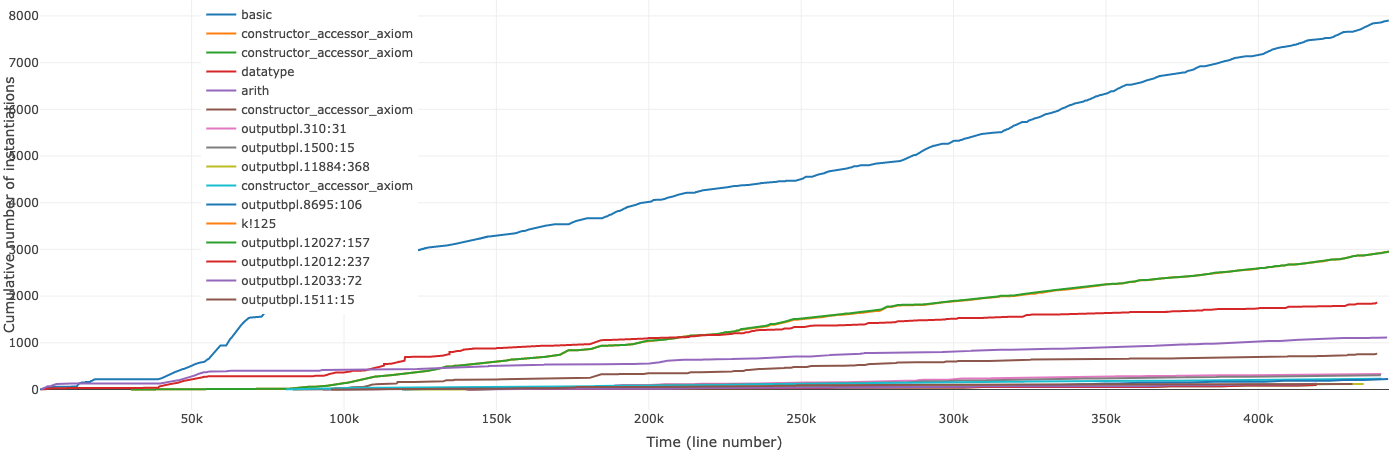

In [18]:
let layout = Layout::new()
    .x_axis(Axis::new().title(Title::new("Time (line number)")))
    .y_axis(Axis::new().title(Title::new("Cumulative number of instantiations")))
    .margin(Margin::new().top(0).bottom(40).left(40).right(10))
    .legend(Legend::new().x(0.2).y(1.0).orientation(Orientation::Vertical).x_anchor(Anchor::Center));

let mut plot = Plot::new();
plot.set_layout(layout);

for (name, values) in instantiation_times.iter().take(16) {
    let (ys, xs) : (Vec<_>, Vec<_>) = values.iter().cloned().enumerate().unzip();
    let trace = Scatter::new(xs, ys).name(name).mode(Mode::Lines);
    plot.add_trace(trace);
}

plot.lab_display();

In [19]:
// Top instantiated quantified term.
model.id2s(&top.peek()?.1)

"basic"

In [20]:
// Final counter and `Ident` value for the top term.
top.peek()?

(7903, basic#)

In [21]:
// Introspect a particular term, given by handle.
// Note that the version number `!9` was added during parsing for disambiguation and is not present in the original log file.
model.term(&Ident::from_str("#4429!9")?)?

Quant { name: "outputbpl.310:31", params: 2, triggers: [#284], body: #4443, var_names: Some([VarName { name: Symbol("v2"), sort: Symbol("T@$Value") }, VarName { name: Symbol("v1"), sort: Symbol("T@$Value") }]) }

In [22]:
let qt = model.term(&Ident::from_str("#4429!9")?)?.clone();

In [23]:
model.id2s(&Ident::from_str("#257!1")?)

"($IsEqual_stratified _1 _0)"

In [24]:
use z3tracer::syntax::Term::Quant;

(match qt { Term::Quant { triggers, .. } => Some(model.id2s(&triggers[0])), _ => None })?

"(pattern ($IsEqual_stratified _1 _0))"